In [52]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [53]:
N = 50
t0 = 0
tf = 3*np.pi
y0 = -1
v0 = -2
def yp(t,y,v):
    return v
def vp(t,y,v):
    return -y

### Euler System

In [54]:
def euler_sys(t0,tf,y0,v0,yp,vp,N):
    ts = [t0]
    ys = [y0]
    vs = [v0]
    delta = (tf - t0)/float(N)
    for i in range(N):
        y0temp = y0
        y0 += delta*yp(t0,y0,v0)
        v0 += delta*vp(t0,y0temp,v0)
        t0 += delta
        ts = np.append(ts,t0)
        ys = np.append(ys,y0)
        vs = np.append(vs,v0)
    return ts, ys, vs

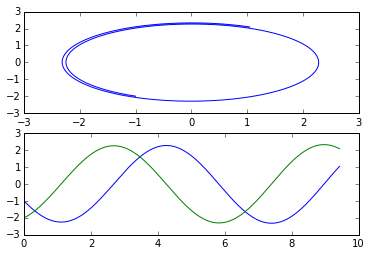

In [55]:
ts, ys, vs = euler_sys(t0,tf,y0,v0,yp,vp,1000)
fig, axarr = plt.subplots(2)
axarr[0].plot(ys,vs)
axarr[1].plot(ts,ys,ts,vs)

### RK4 System

In [56]:
def rk4_sys(t0,tf,y0,v0,yp,vp,N):
    ts = [t0]
    ys = [y0]
    vs = [v0]
    delta = (tf - t0)/float(N)
    hd = delta/2
    for i in range(N):
        y0temp = y0
        s1 = yp(t0,y0,v0)
        s2 = yp(t0 + hd,y0 + hd*s1,v0)
        s3 = yp(t0 + hd,y0 + hd*s2,v0)
        s4 = yp(t0 + delta,y0 + delta*s3,v0)        
        y0 += delta*(s1 + 2*s2 + 2*s3 + s4)/6
        s1 = vp(t0,y0temp,v0)
        s2 = vp(t0 + hd,y0temp,v0 + hd*s1)
        s3 = vp(t0 + hd,y0temp,v0 + hd*s2)
        s4 = vp(t0 + delta,y0temp,v0 + delta*s3)        
        v0 += delta*(s1 + 2*s2 + 2*s3 + s4)/6
        t0 += delta
        ts = np.append(ts,t0)
        ys = np.append(ys,y0)
        vs = np.append(vs,v0)
    return ts, ys, vs

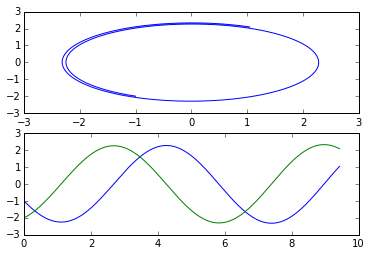

In [57]:
ts, ys, vs = rk4_sys(t0,tf,y0,v0,yp,vp,1000)
fig, axarr = plt.subplots(2)
axarr[0].plot(ys,vs)
axarr[1].plot(ts,ys,ts,vs)

### Predator Prey

In [58]:
N = 1000
t0 = 0
tf = 100
S0 = 20
F0 = 20
a, b, c, d = .4, .01, .3, .005
def Fp(t,F,S):
    return (a - b*S)*F
def Sp(t,F,S):
    return (-c + d*F)*S

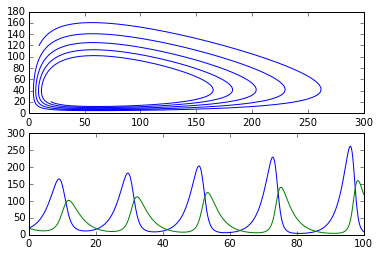

In [59]:
ts, Fs, Ss = rk4_sys(t0,tf,F0,S0,Fp,Sp,N)
fig, axarr = plt.subplots(2)
axarr[0].plot(Fs,Ss)
axarr[1].plot(ts,Fs,ts,Ss)

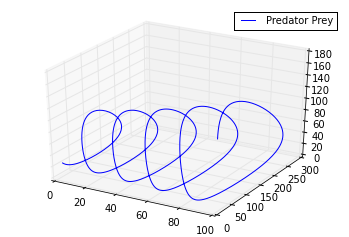

In [60]:
mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(ts, Fs, Ss, label='Predator Prey')
ax.legend()

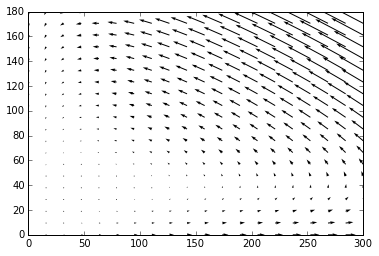

In [61]:
fmax = 300.0
fmin = 0
NF = 20
smax = 180.0
smin = 0
NS = 20
f = np.linspace(fmin,fmax,NF)
s = np.linspace(smin,smax,NS)
F, S = np.meshgrid(f, s)
fcomp = Fp(0,F,S)
scomp = Sp(0,F,S)
QP = plt.quiver(F, S, fcomp, scomp)